In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
your_username = "rjassef"
#folder_mafoutput = "Mean_Night_Filter"
folder_mafoutput = "Mean_Night_Filter_v2"
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts = dict()
for runName in resultDbs:
    bundleDicts[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
import sys
sys.path.append("..")
from script_utils import find_completed_runs
completed_runs = find_completed_runs(5, resultDbPath, metricDataPath, bundleDicts)
print(len(completed_runs))
#print(completed_runs)

115


In [9]:
# check keys
dbRuns = list(resultDbs.keys())
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys)

[(1, 'MeanNightFilterSeparationMetric_u_g'), (2, 'MeanNightFilterSeparationMetric_z_y'), (3, 'MeanNightFilterSeparationMetric_i_z'), (4, 'MeanNightFilterSeparationMetric_r_i'), (5, 'MeanNightFilterSeparationMetric_g_r')]


In [10]:
#Legacy from old run, where FBS v1.5 was ran after FBS v1.6, so the keys are in different order.
#This code just puts them all together in the same order. 
bundleDicts_reshuffled = dict()
for run in dbRuns:
    bundleDicts_reshuffled[run] = dict()
    for key in list(bundleDicts[run].keys()):
        if key[1] == 'MeanNightFilterSeparationMetric_u_g':
            new_key = (1,key[1])
        elif key[1] == 'MeanNightFilterSeparationMetric_g_r':
            new_key = (2,key[1])
        elif key[1] == 'MeanNightFilterSeparationMetric_r_i':
            new_key = (3,key[1])
        elif key[1] == 'MeanNightFilterSeparationMetric_i_z':
            new_key = (4,key[1])
        elif key[1] == 'MeanNightFilterSeparationMetric_z_y':
            new_key = (5,key[1])
        bundleDicts_reshuffled[run][new_key] =  bundleDicts[run][key]       

In [11]:
bd_keys = list(bundleDicts_reshuffled[dbRuns[16]].keys())
print(bd_keys)

[(1, 'MeanNightFilterSeparationMetric_u_g'), (4, 'MeanNightFilterSeparationMetric_i_z'), (5, 'MeanNightFilterSeparationMetric_z_y'), (2, 'MeanNightFilterSeparationMetric_g_r'), (3, 'MeanNightFilterSeparationMetric_r_i')]


In [12]:
filters = ['u','g','r','i','z','y']
metricKeys = list()
for k in range(len(filters[:-1])):
    metricKeys.append((k+1,'MeanNightFilterSeparationMetric_{0}_{1}'.format(filters[k], filters[k+1])))

#### Time between u and g

filterdist_indx3_v1.5_10yrs 0.0
dcr_nham2_ug_v1.5_10yrs 9.680851063829786


/home/idies/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/colors.py:494: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


baseline_nexp1_v1.6_10yrs 3.6346153846153846
barebones_nexp2_v1.6_10yrs 13.444444444444445


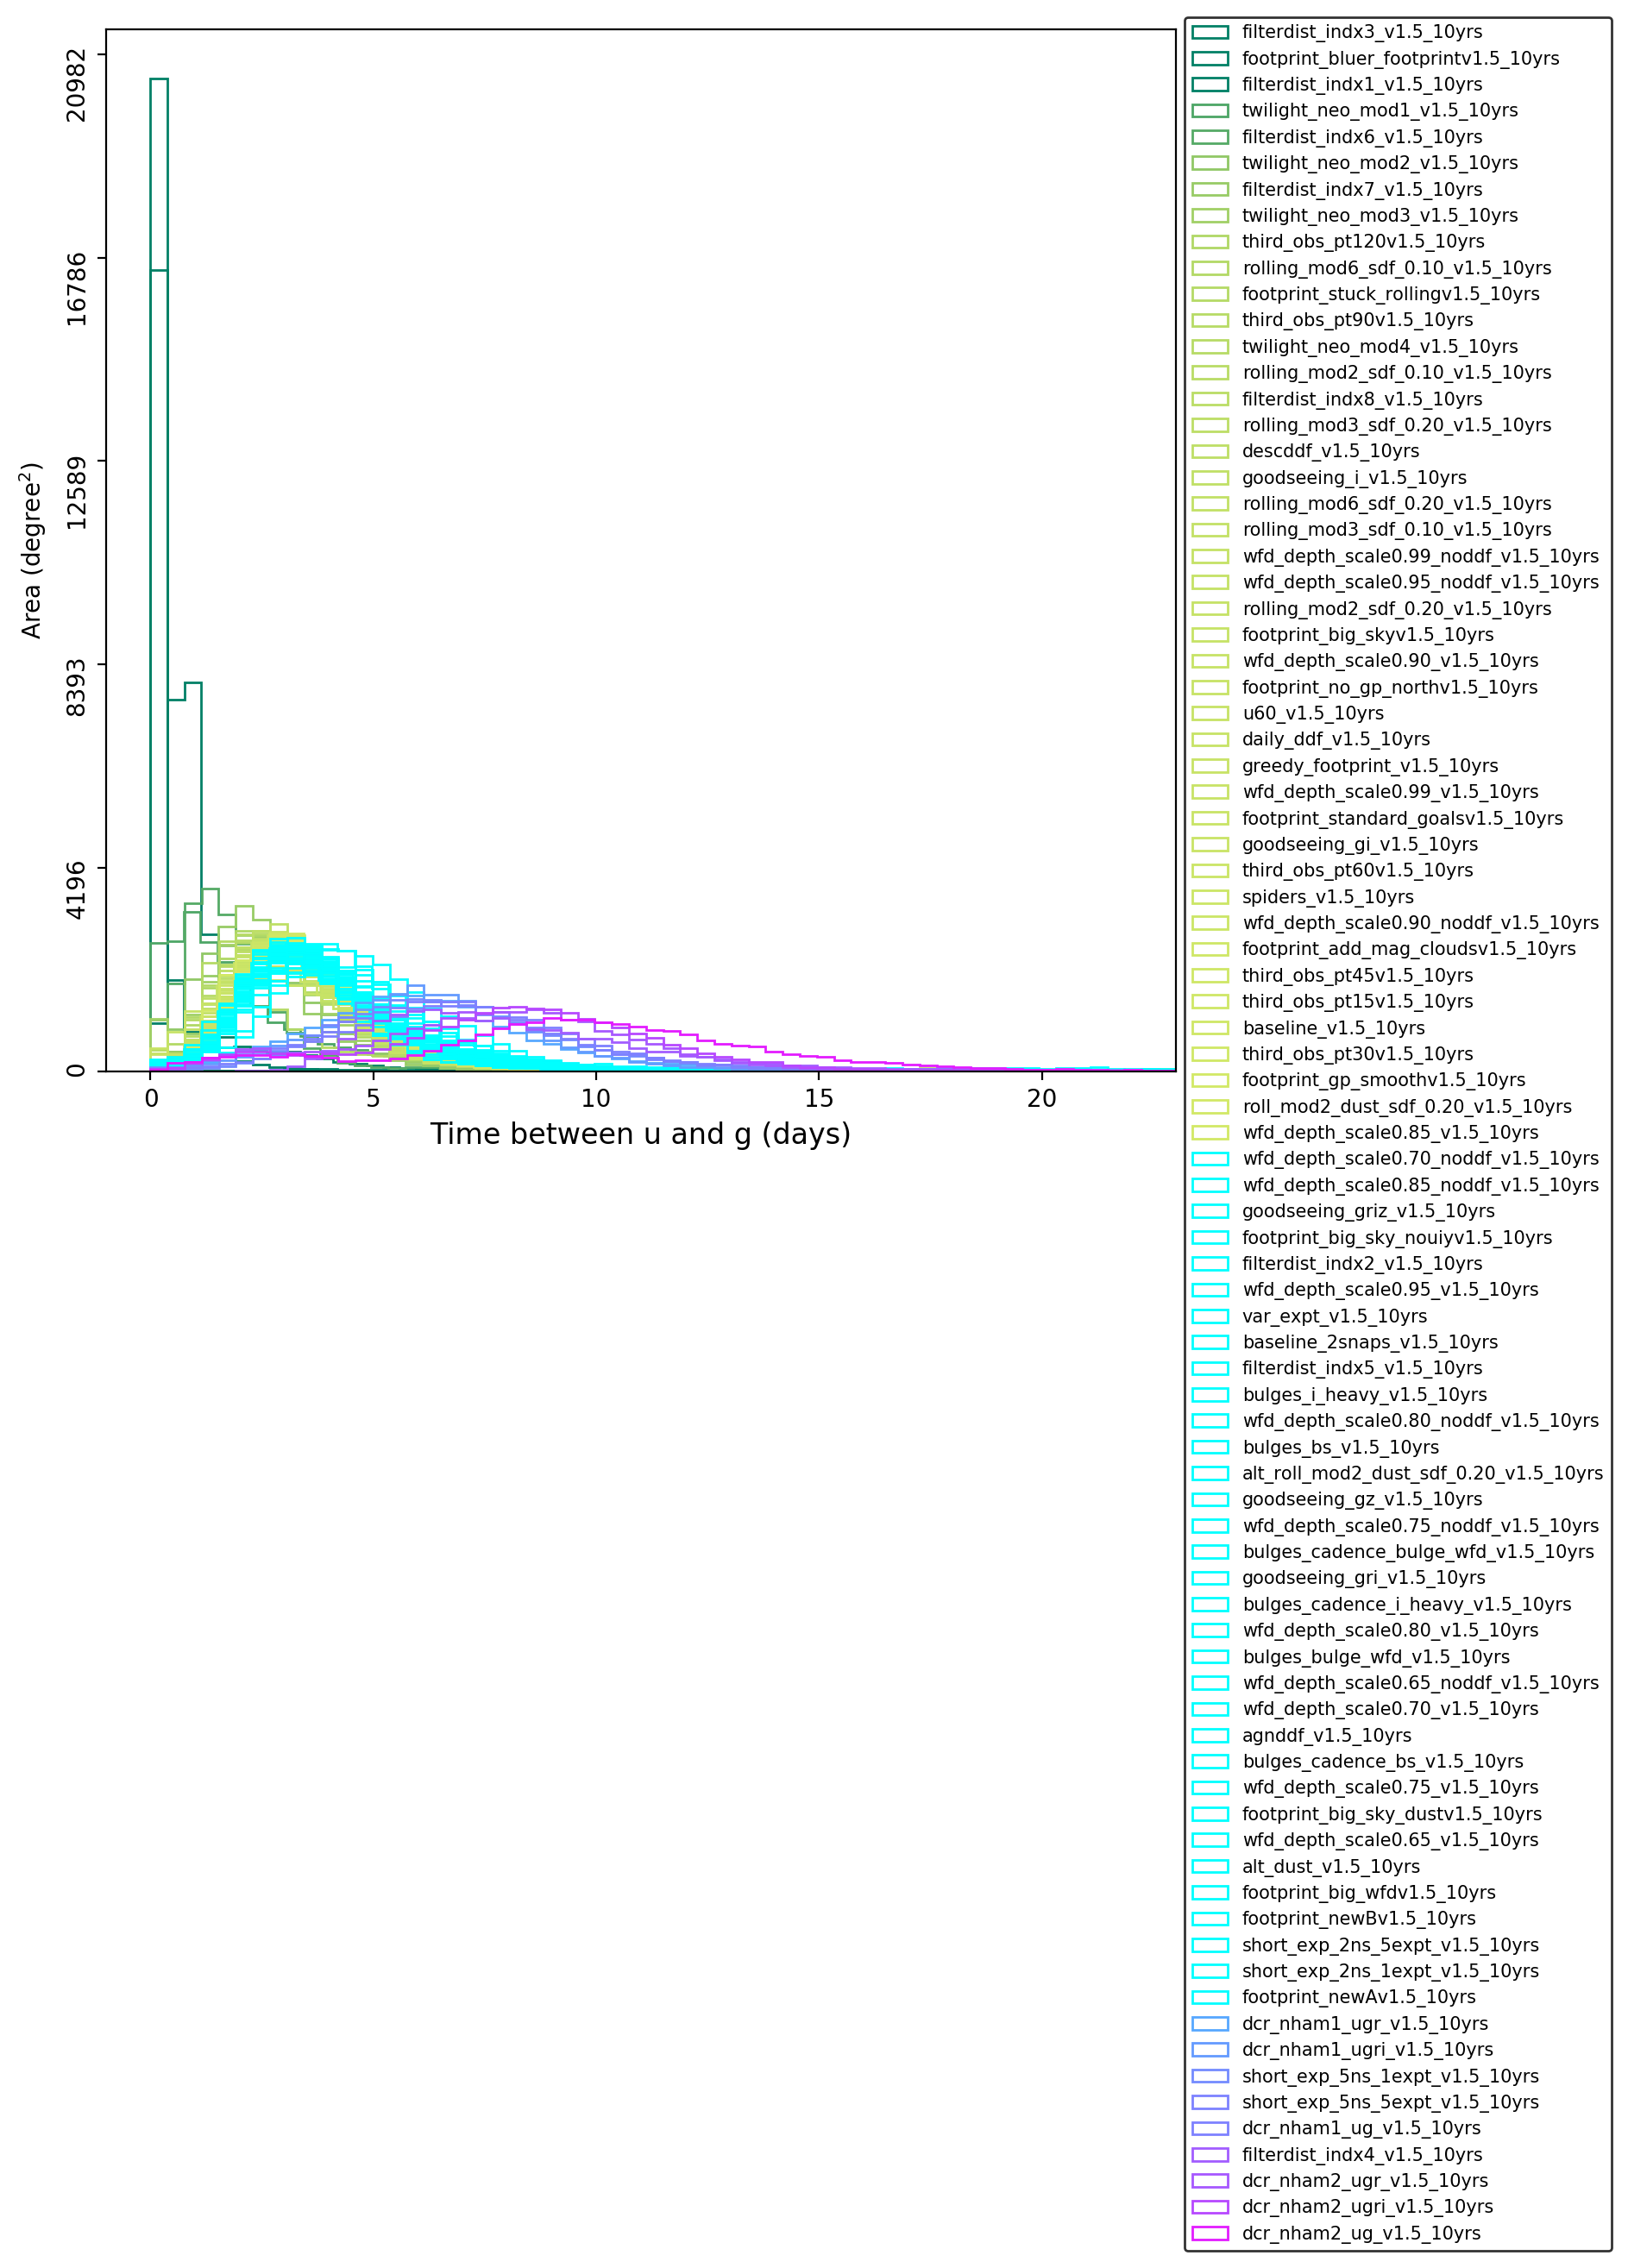

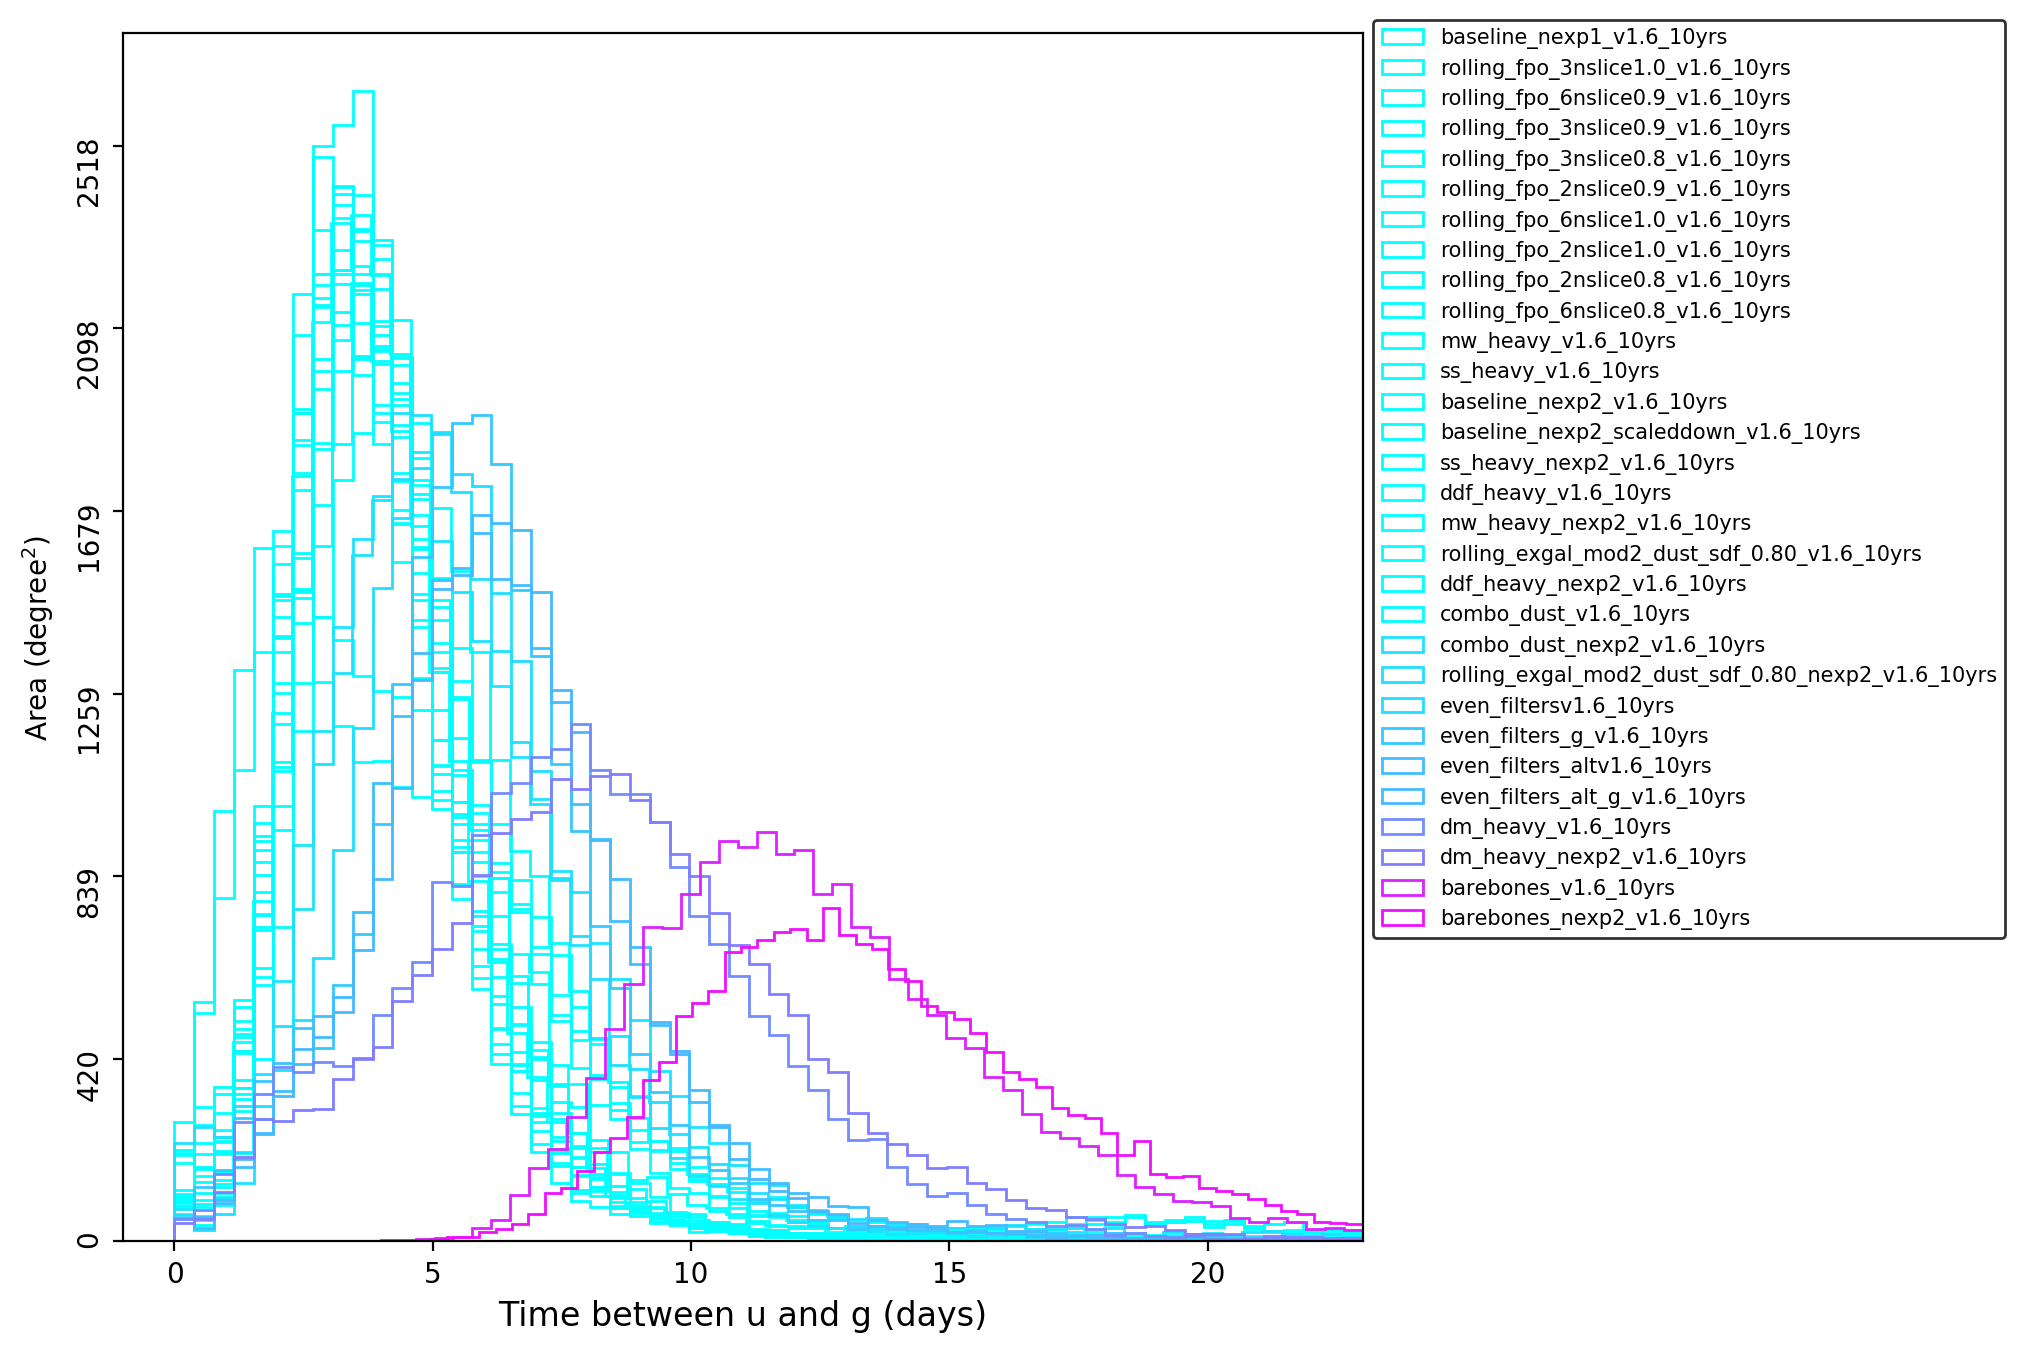

In [13]:
#Plot first FBS v1.5 and then FBS v1.6
data_func = None
xlabel = r"Time between u and g (days)"

Key = metricKeys[0]

healpix_pixarea = bundleDicts_reshuffled[dbRuns[0]][Key].slicer.pixArea * u.sr

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, mds_offset_cm=1)

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=mpl.cm.cool, xlabel=xlabel, mds_offset_cm=1)

#### Time between g and r

short_exp_5ns_1expt_v1.5_10yrs 0.8490566037735849
filterdist_indx1_v1.5_10yrs 4.067114093959732
even_filters_altv1.6_10yrs 0.5151515151515151
barebones_nexp2_v1.6_10yrs 5.425


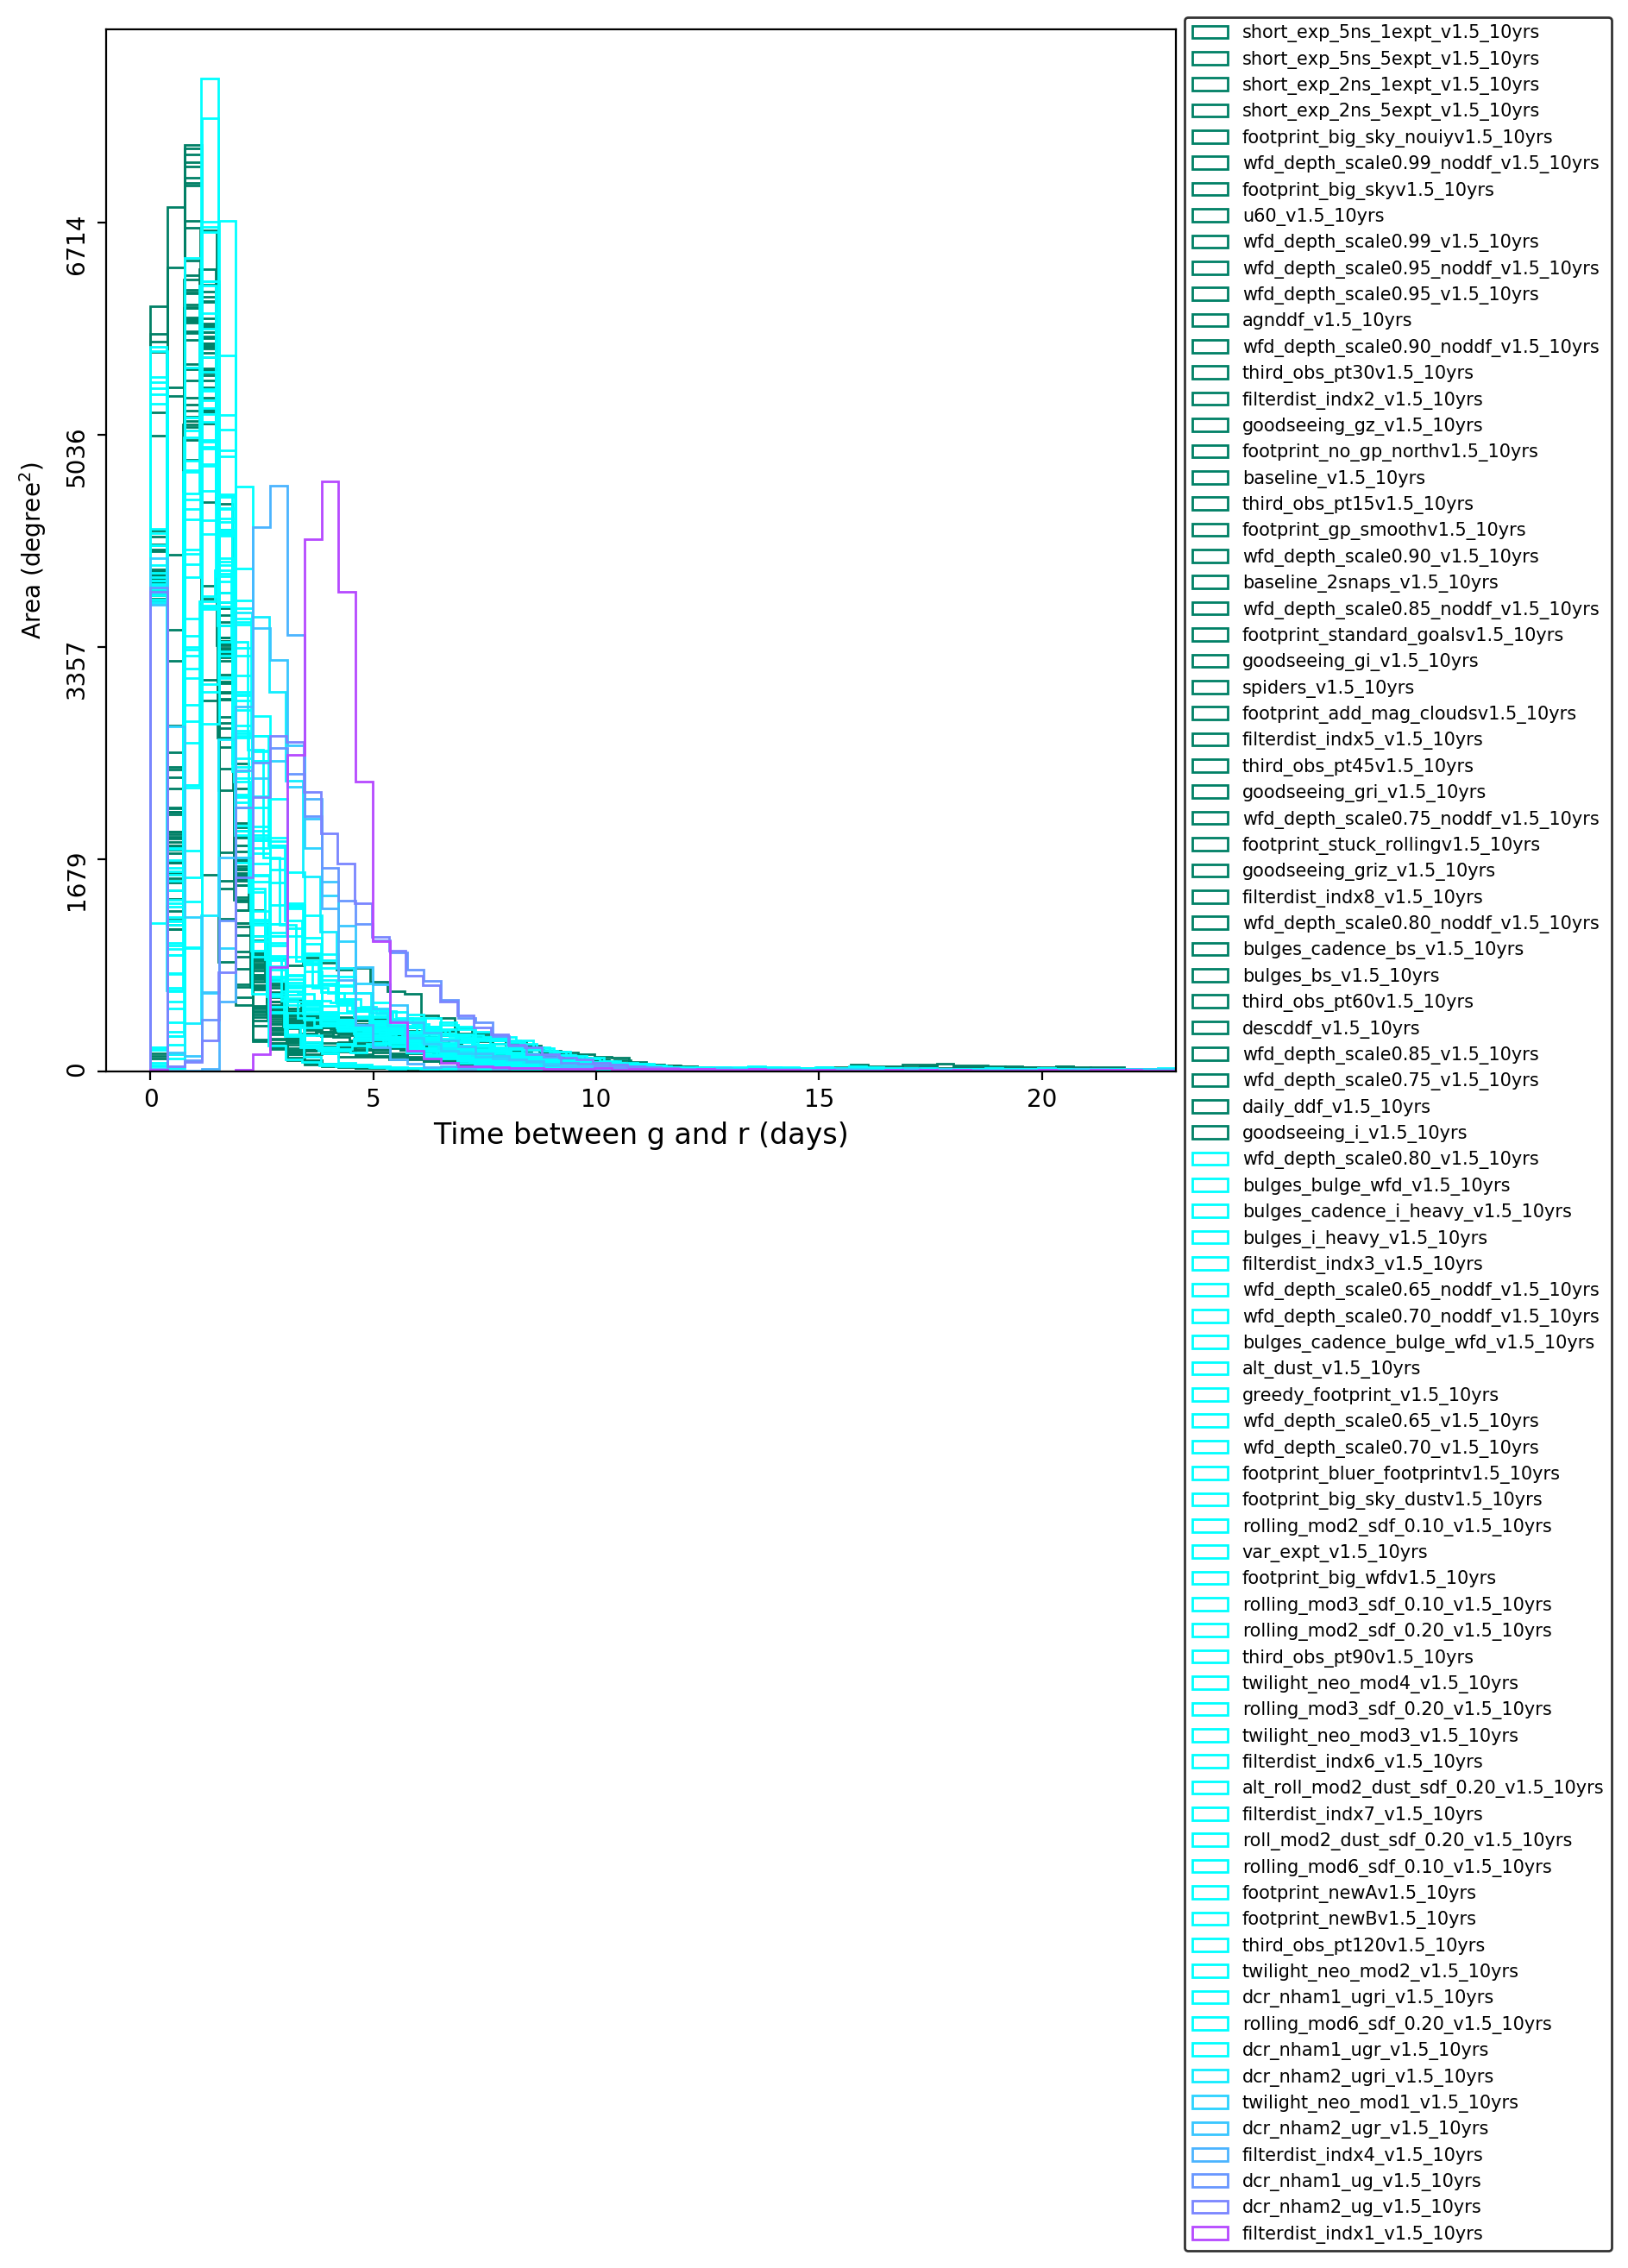

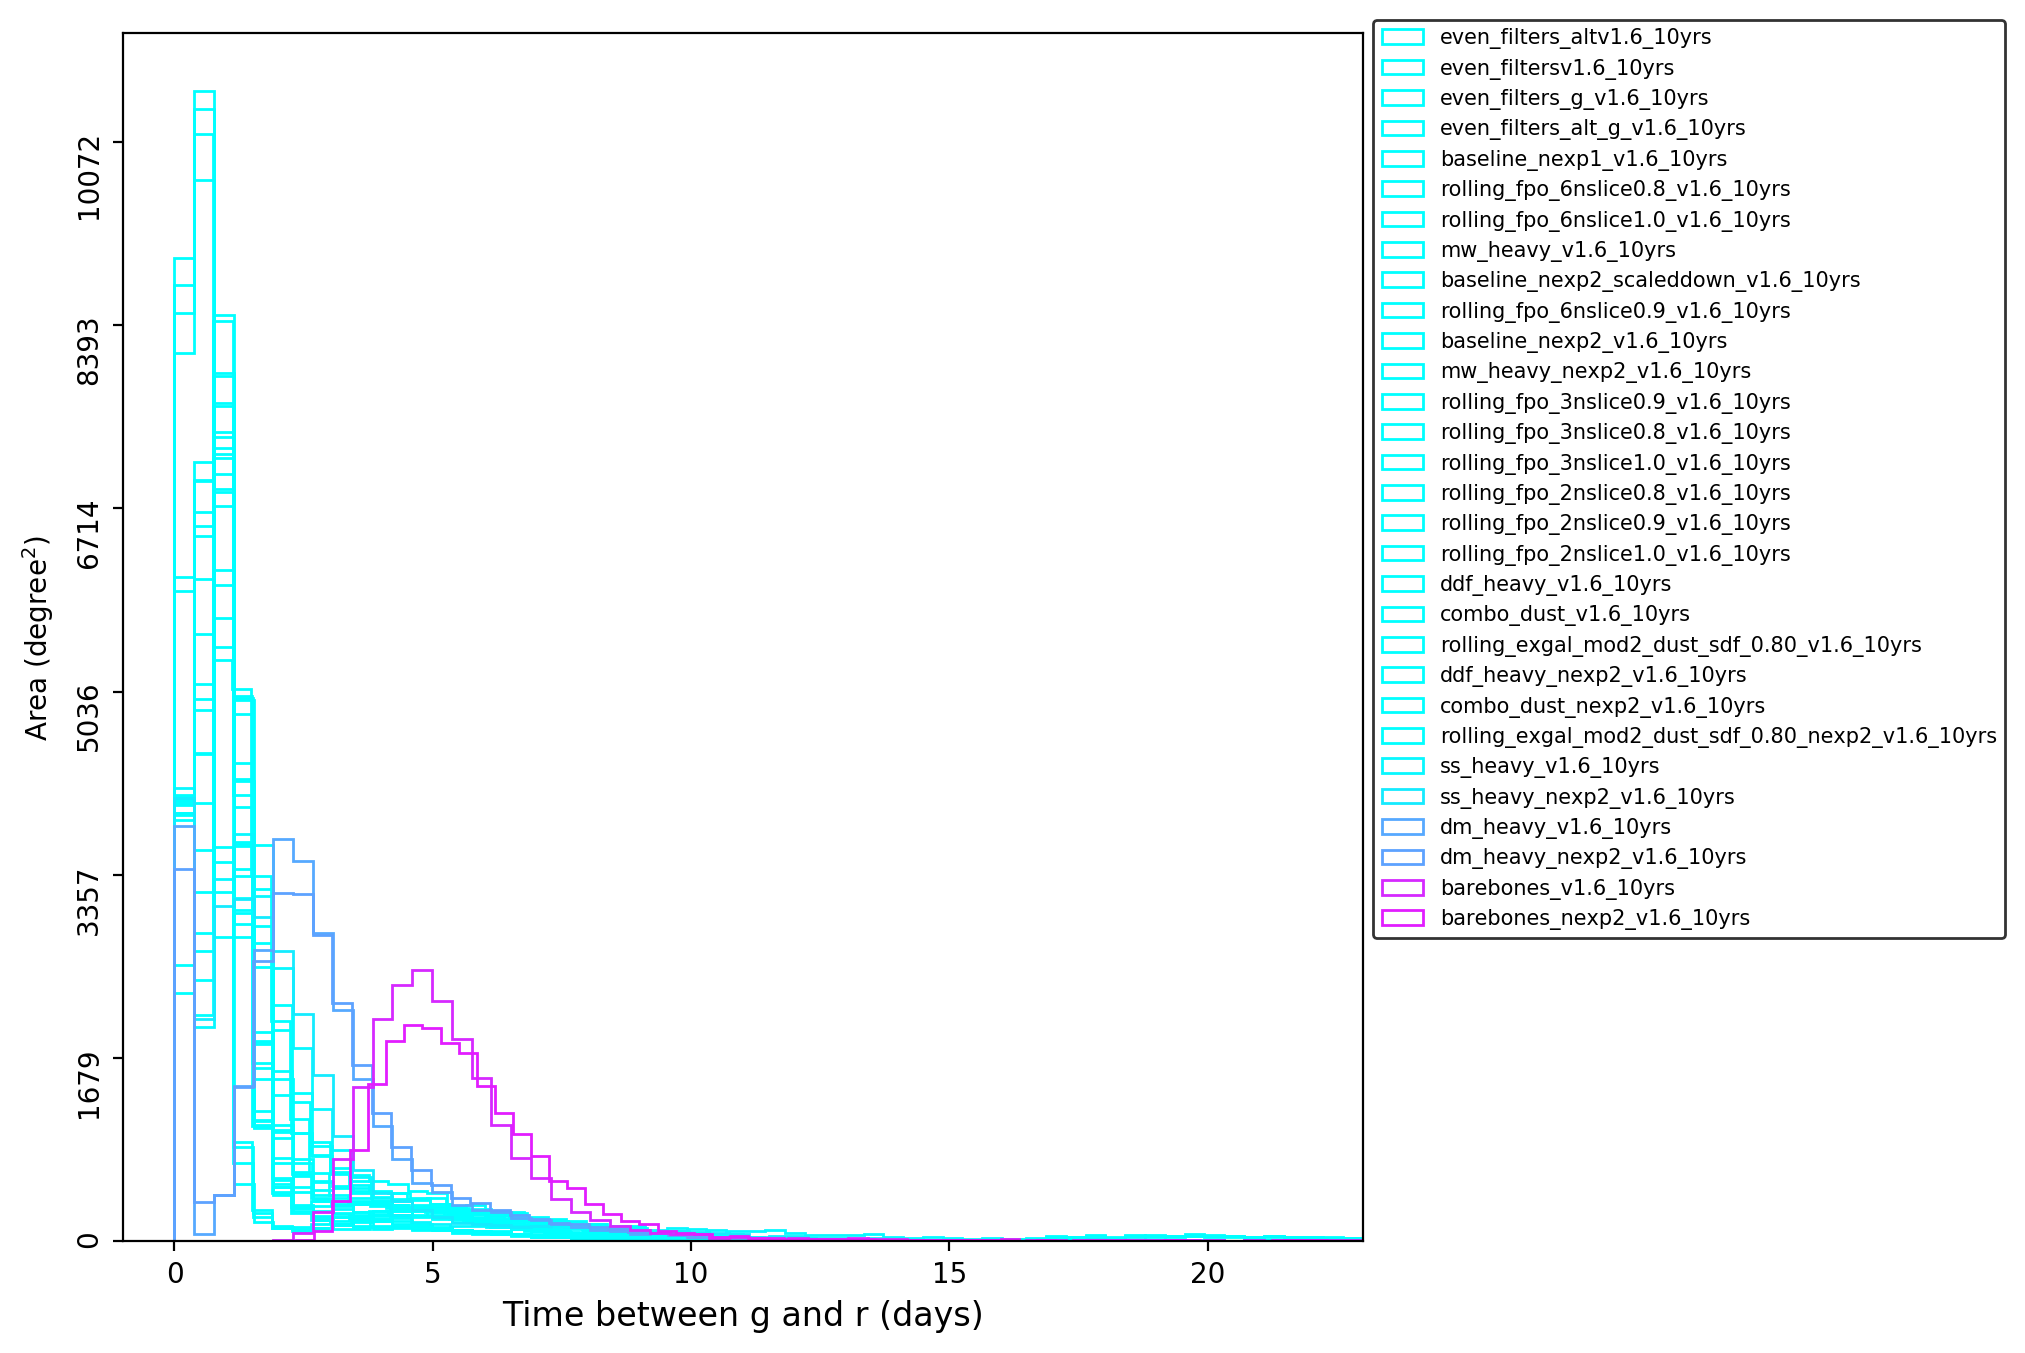

In [14]:
#Plot first FBS v1.5 and then FBS v1.6
data_func = None
xlabel = r"Time between g and r (days)"

Key = metricKeys[1]

healpix_pixarea = bundleDicts_reshuffled[dbRuns[0]][Key].slicer.pixArea * u.sr

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, mds_offset_cm=1)

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=mpl.cm.cool, xlabel=xlabel, mds_offset_cm=1)

#### Time between r and i

filterdist_indx6_v1.5_10yrs 1.8666666666666667
twilight_neo_mod1_v1.5_10yrs 6.954887218045113
even_filters_g_v1.6_10yrs 2.525
ss_heavy_nexp2_v1.6_10yrs 10.484250992063492


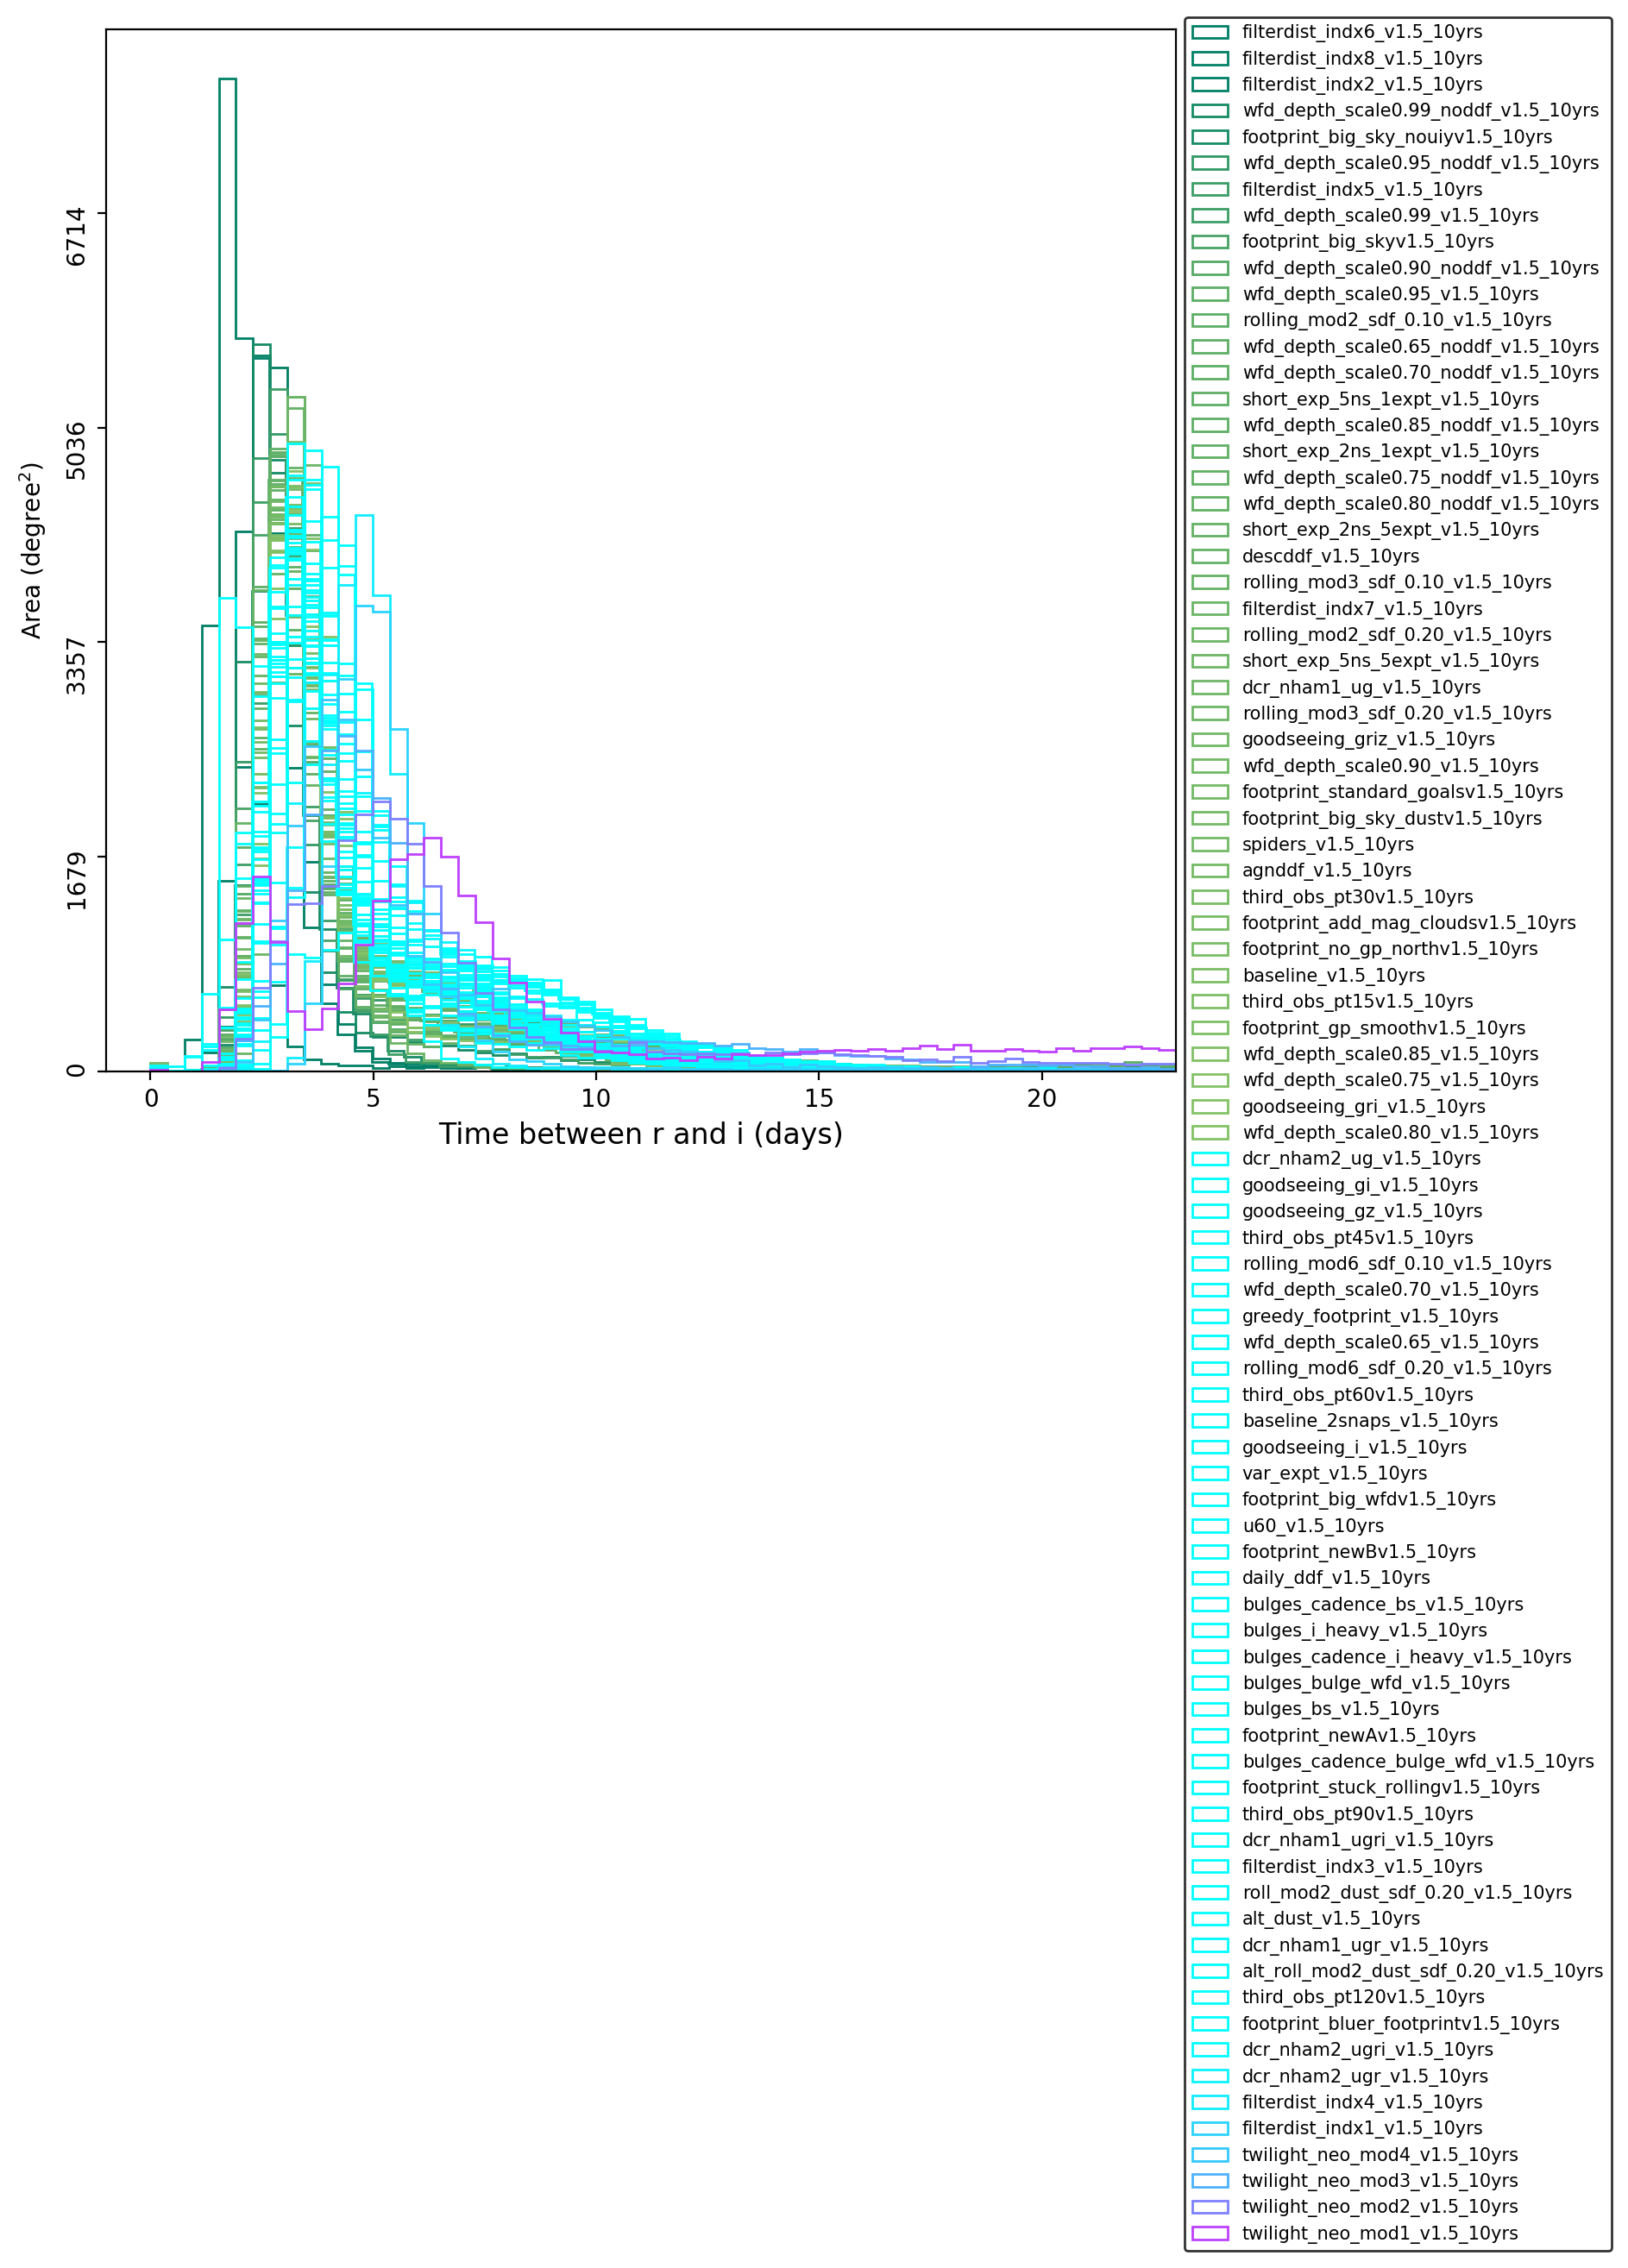

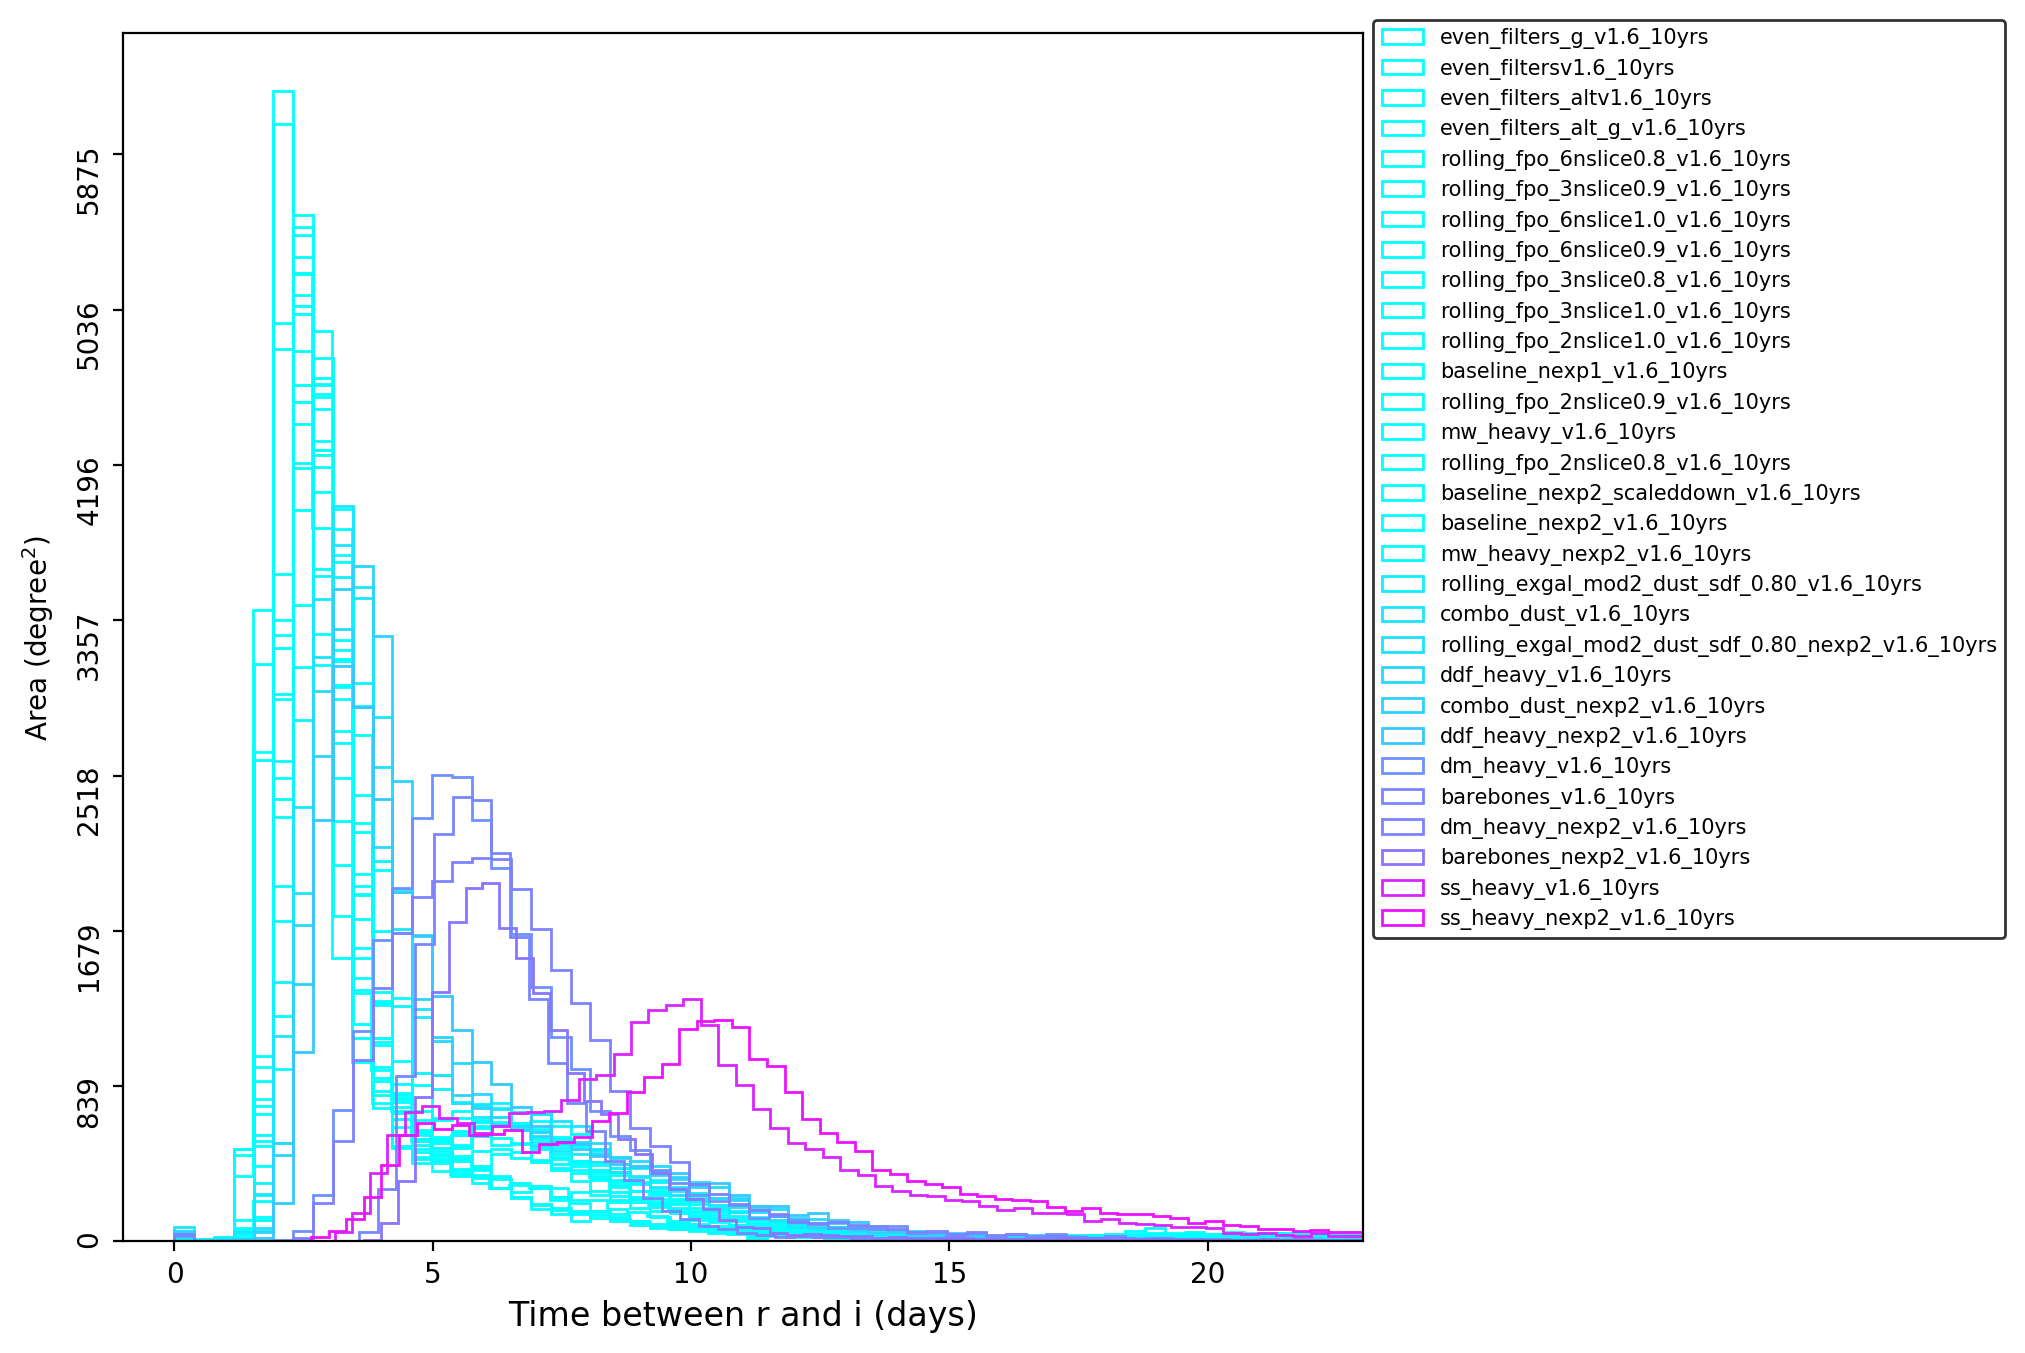

In [15]:
#Plot first FBS v1.5 and then FBS v1.6
data_func = None
xlabel = r"Time between r and i (days)"

Key = metricKeys[2]

healpix_pixarea = bundleDicts_reshuffled[dbRuns[0]][Key].slicer.pixArea * u.sr

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, mds_offset_cm=1)

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=mpl.cm.cool, xlabel=xlabel, mds_offset_cm=1)

#### Time between i and z

filterdist_indx1_v1.5_10yrs 3.672
twilight_neo_mod1_v1.5_10yrs 9.874015748031496
ss_heavy_v1.6_10yrs 2.6153846153846154
barebones_nexp2_v1.6_10yrs 9.489583333333334


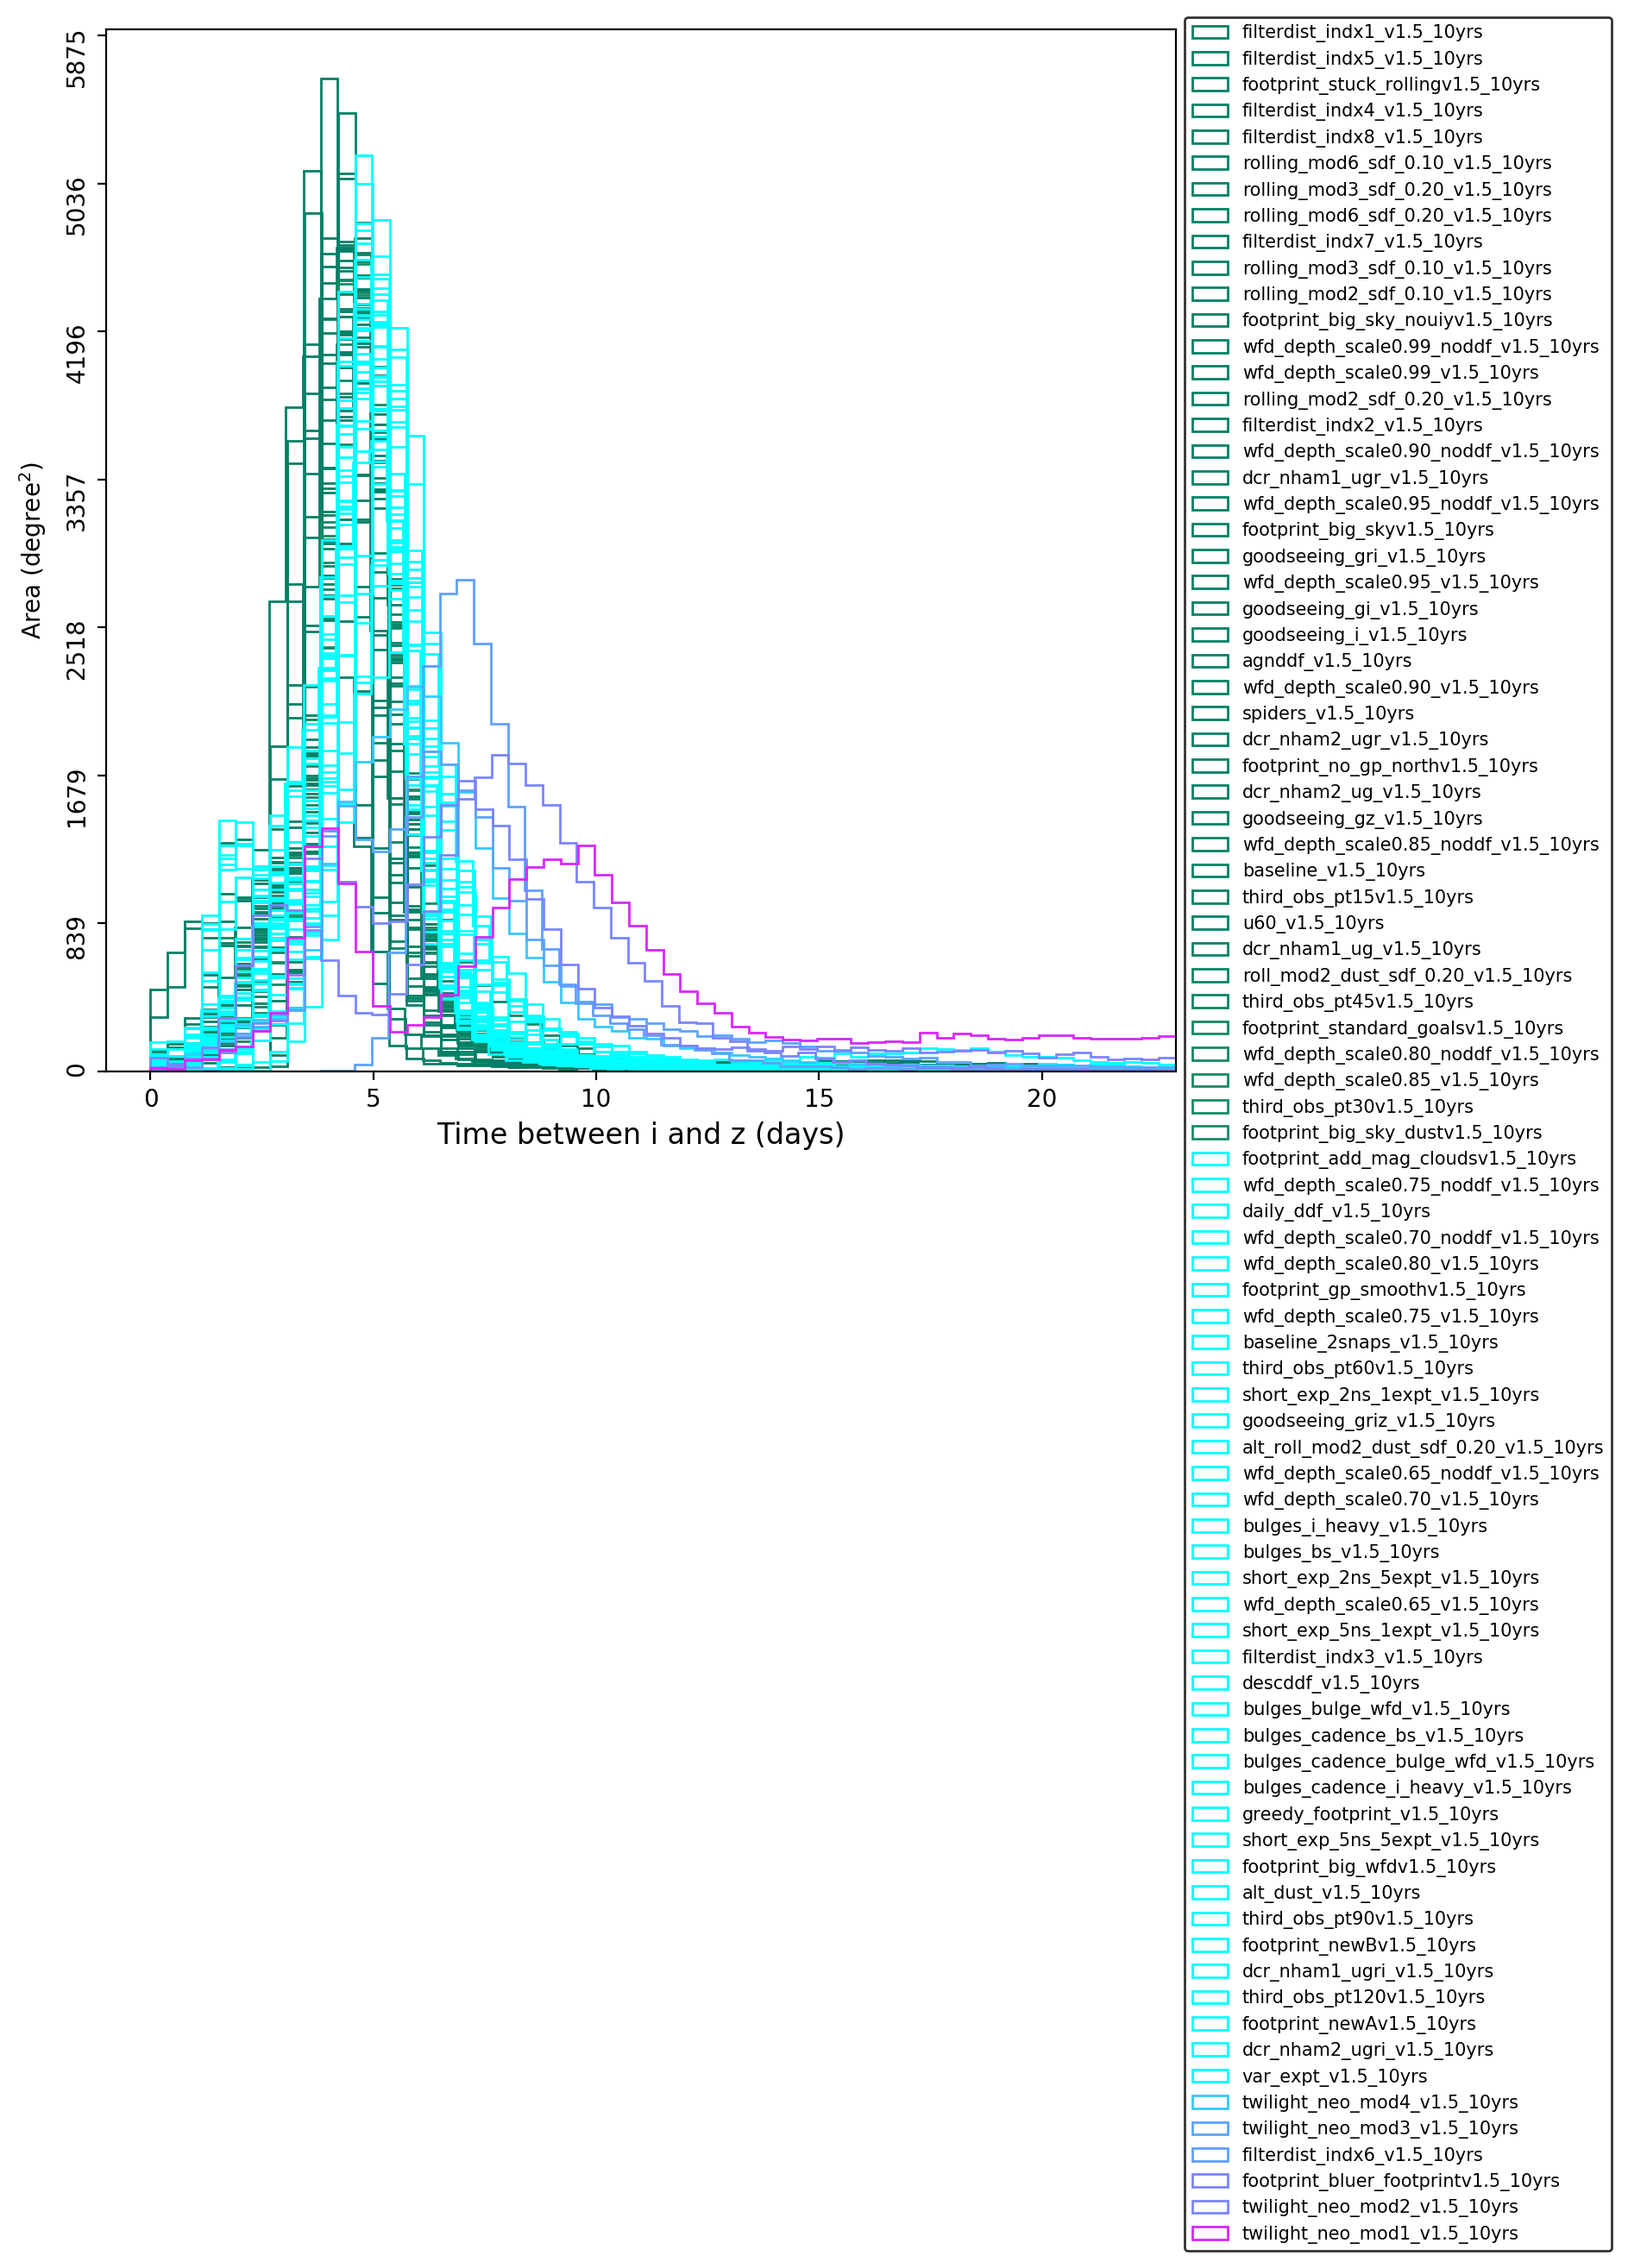

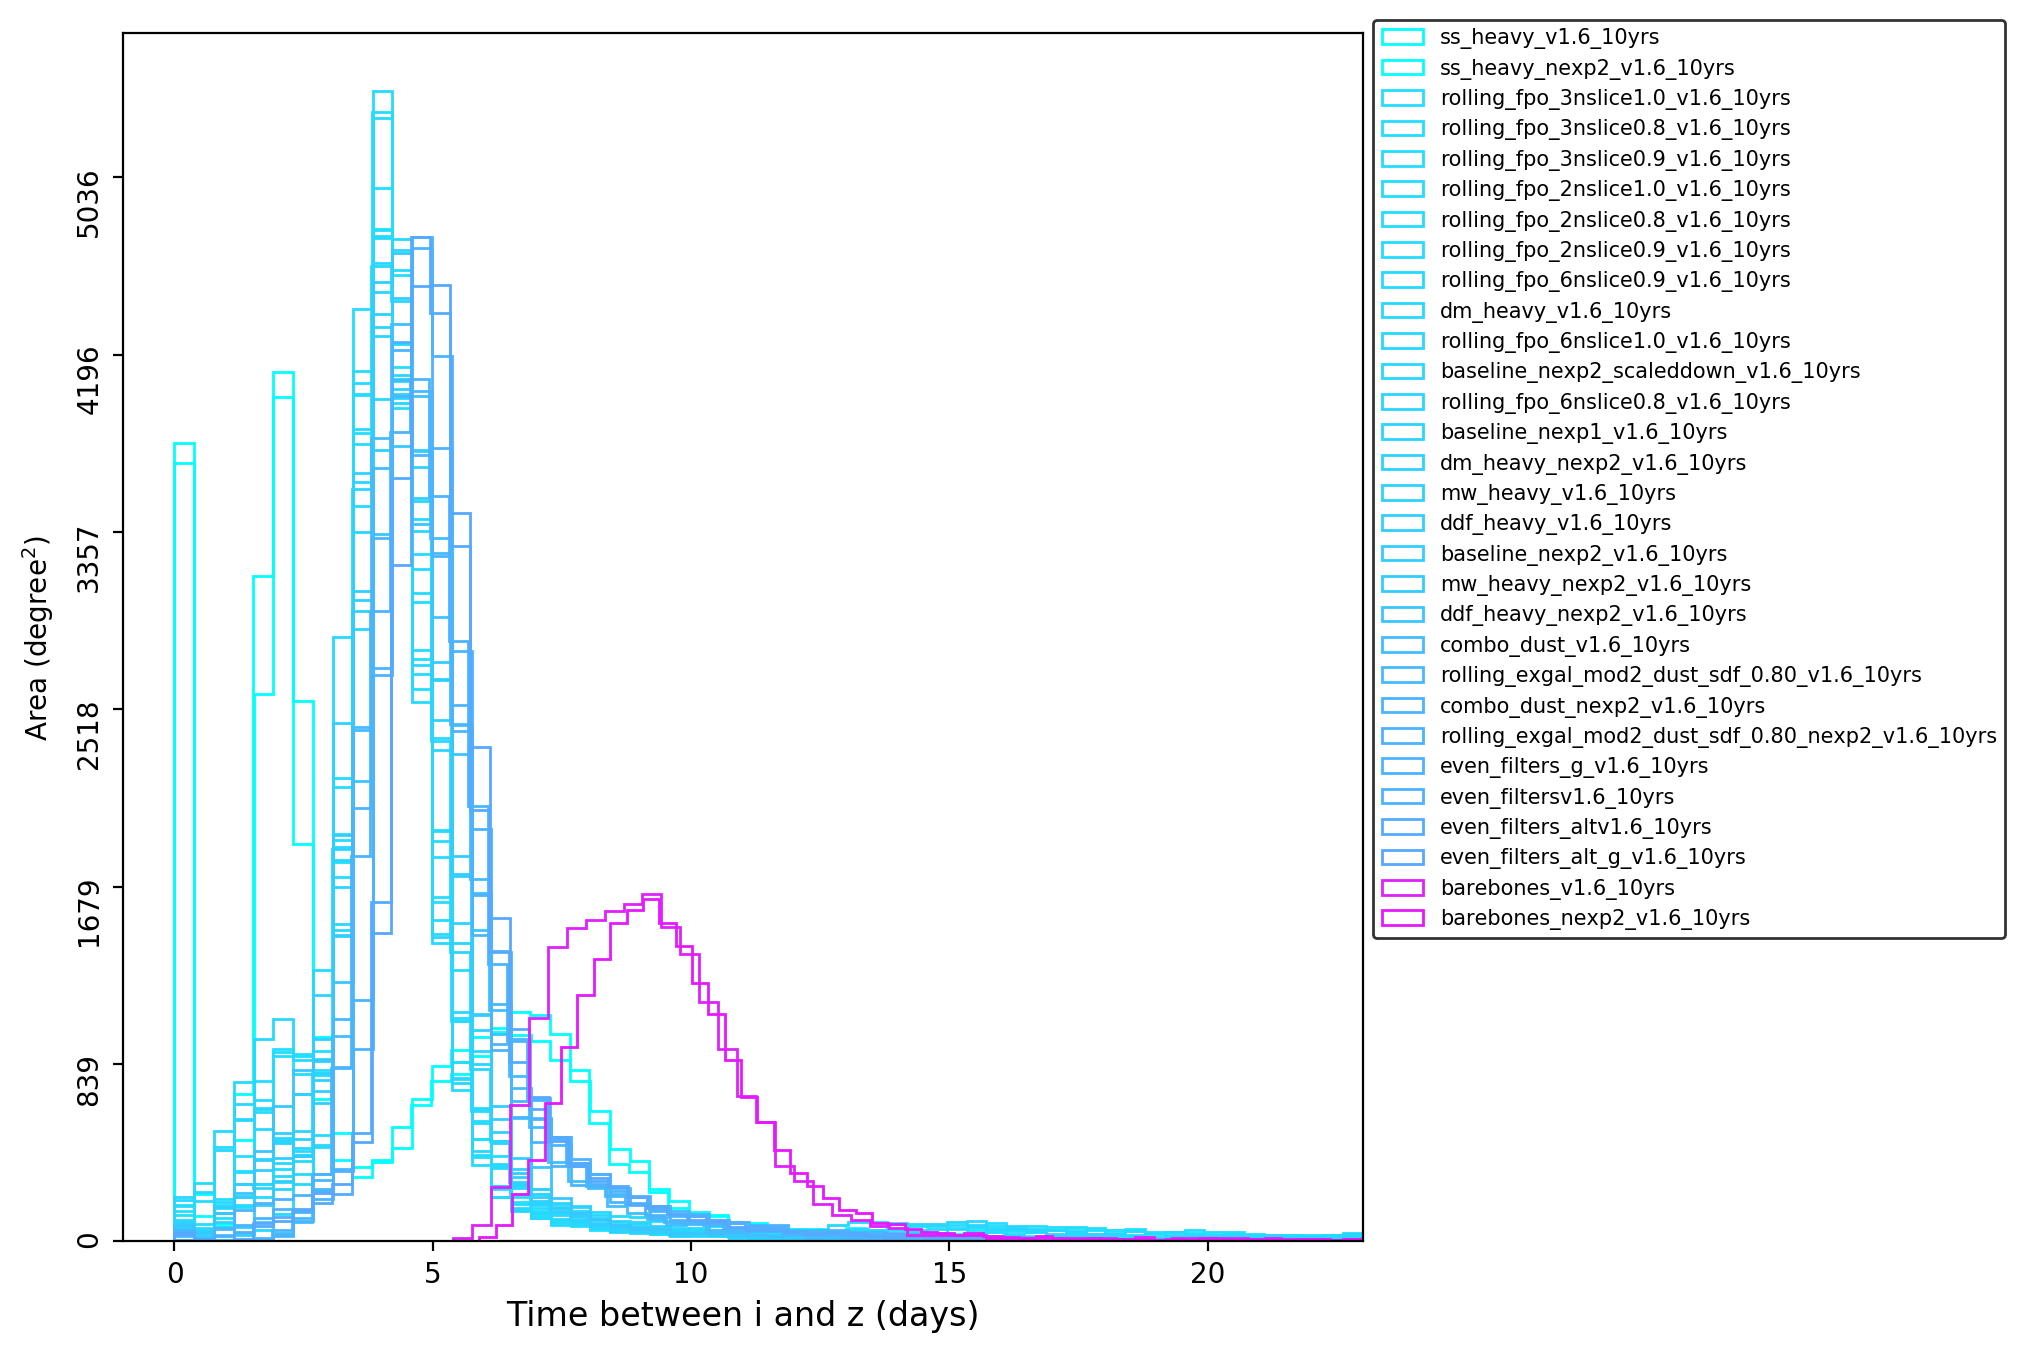

In [16]:
#Plot first FBS v1.5 and then FBS v1.6
data_func = None
xlabel = r"Time between i and z (days)"

Key = metricKeys[3]

healpix_pixarea = bundleDicts_reshuffled[dbRuns[0]][Key].slicer.pixArea * u.sr

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, mds_offset_cm=1)

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=mpl.cm.cool, xlabel=xlabel, mds_offset_cm=1)

#### Time between z and y

filterdist_indx5_v1.5_10yrs 4.079694612046152
rolling_mod6_sdf_0.20_v1.5_10yrs 11.733602150537635
rolling_fpo_3nslice1.0_v1.6_10yrs 5.114285714285714
combo_dust_nexp2_v1.6_10yrs 8.29126213592233


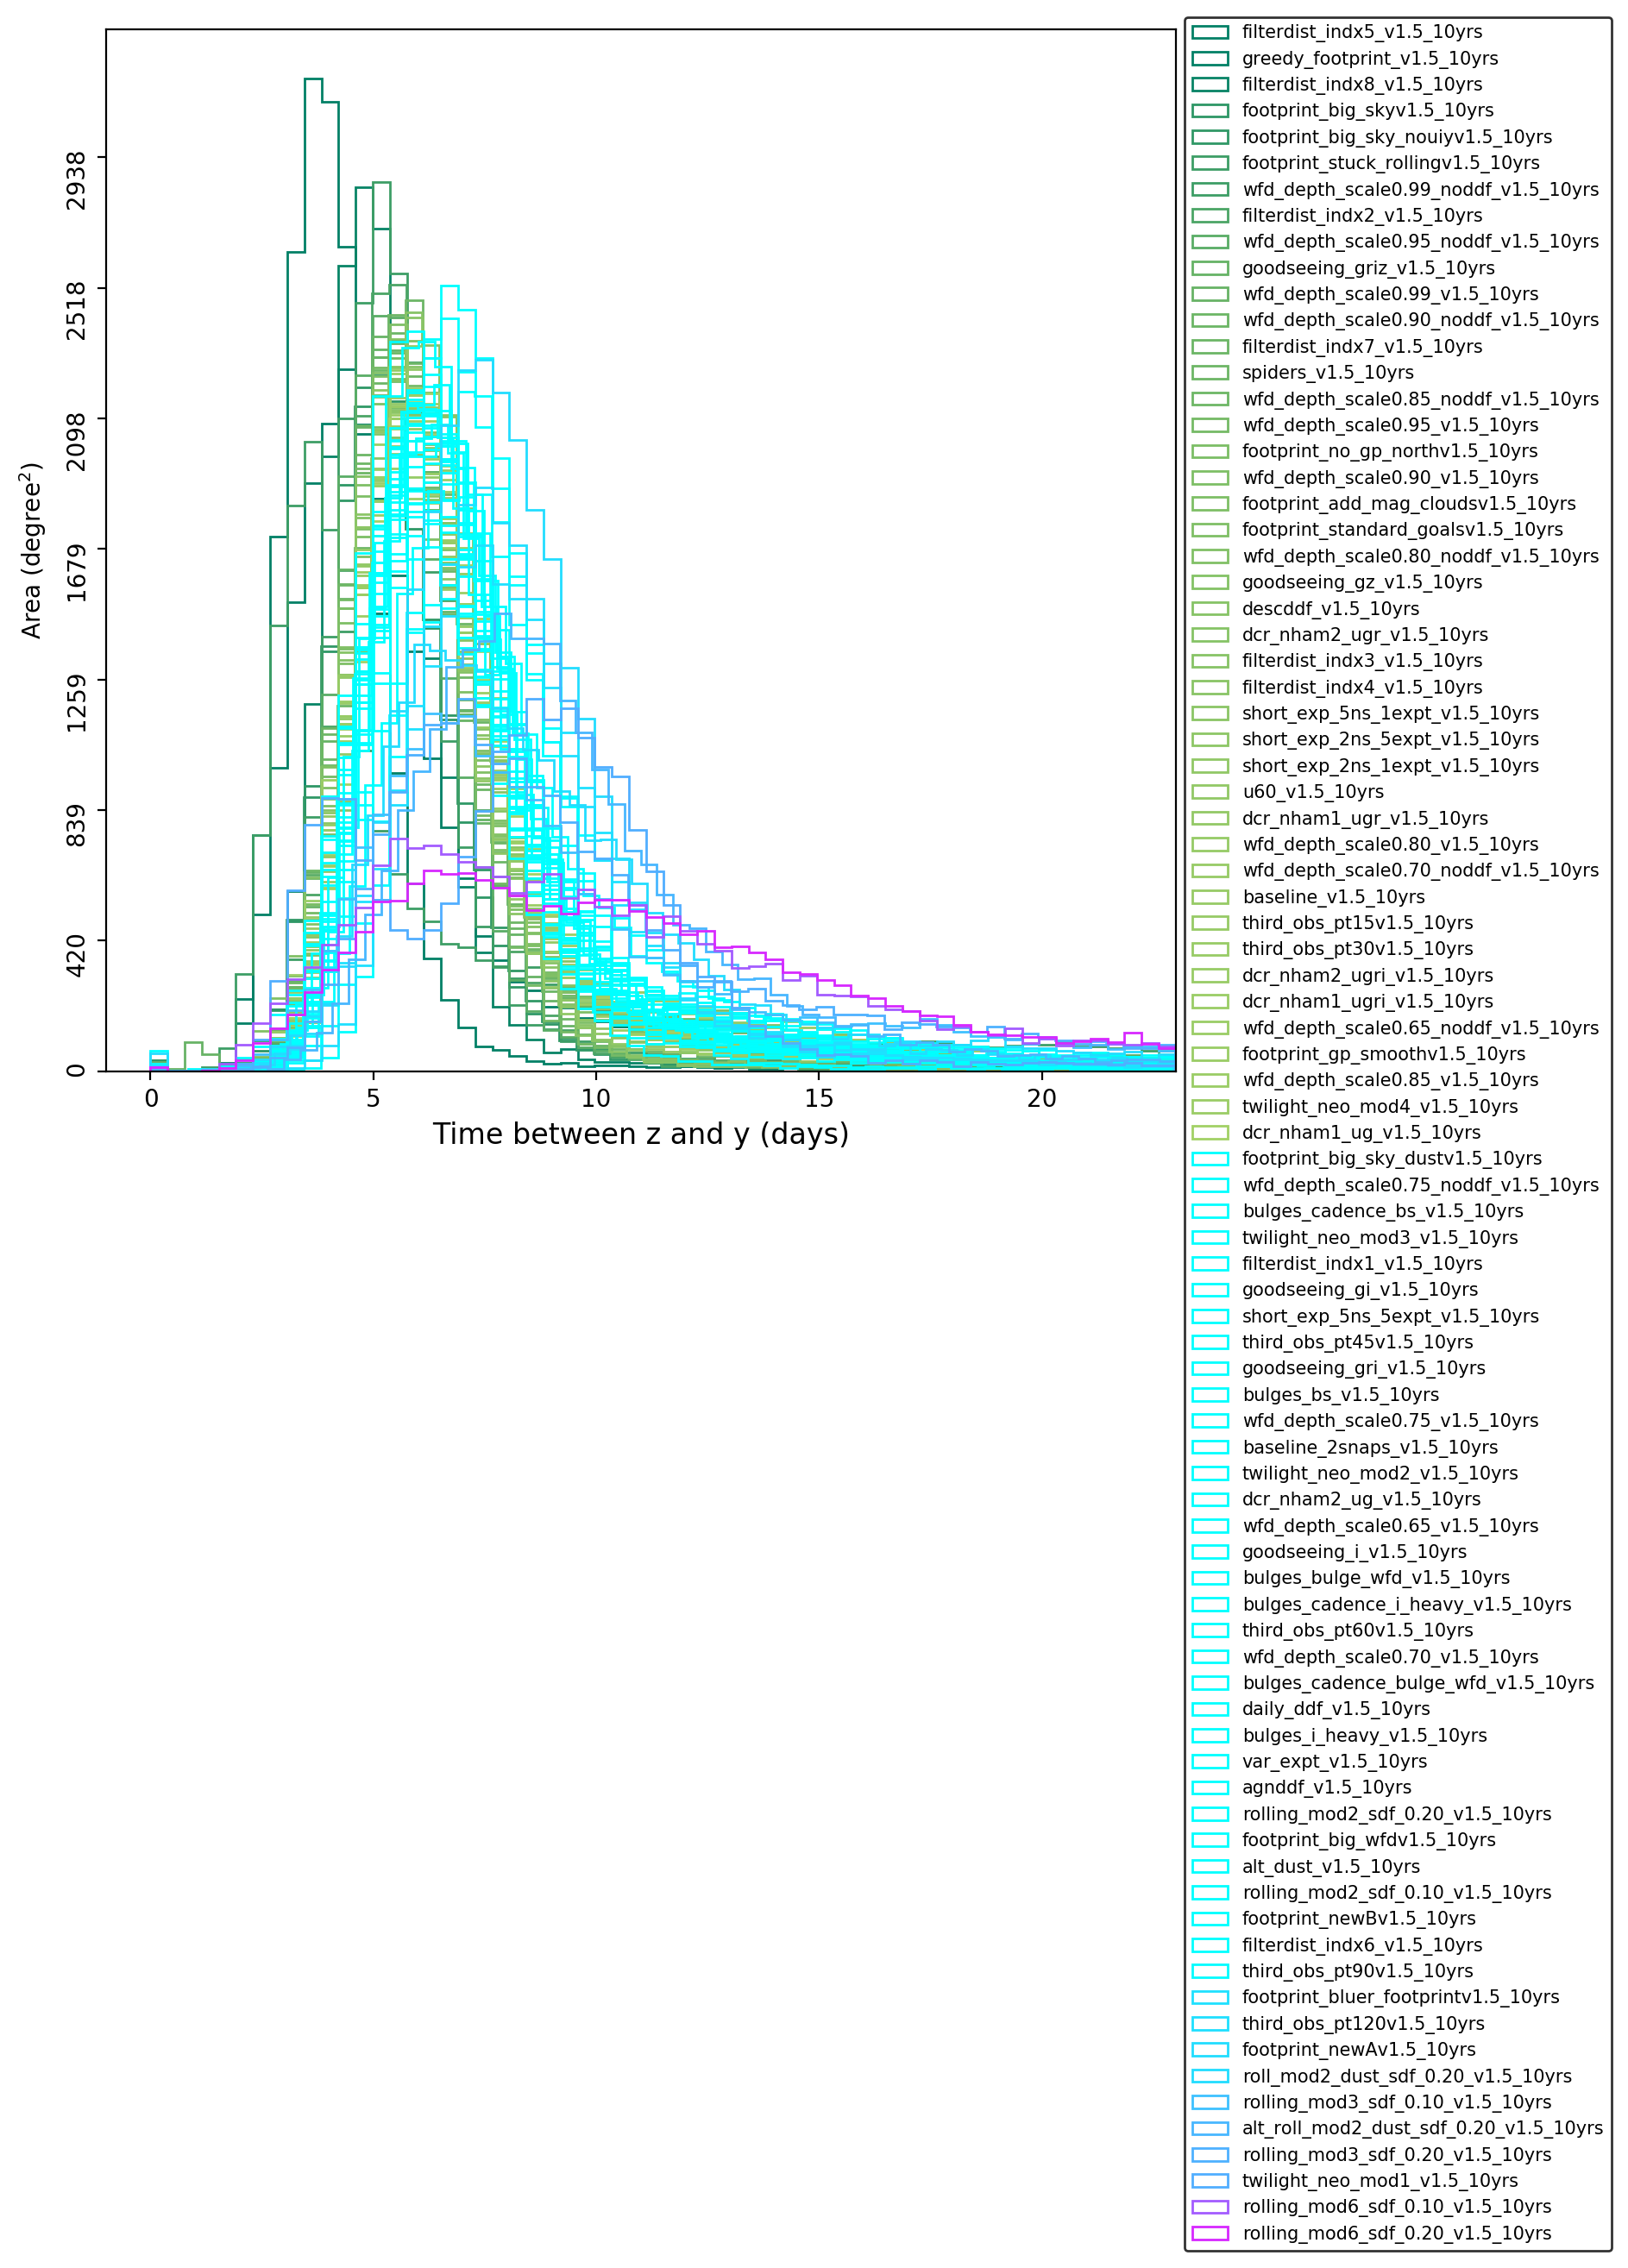

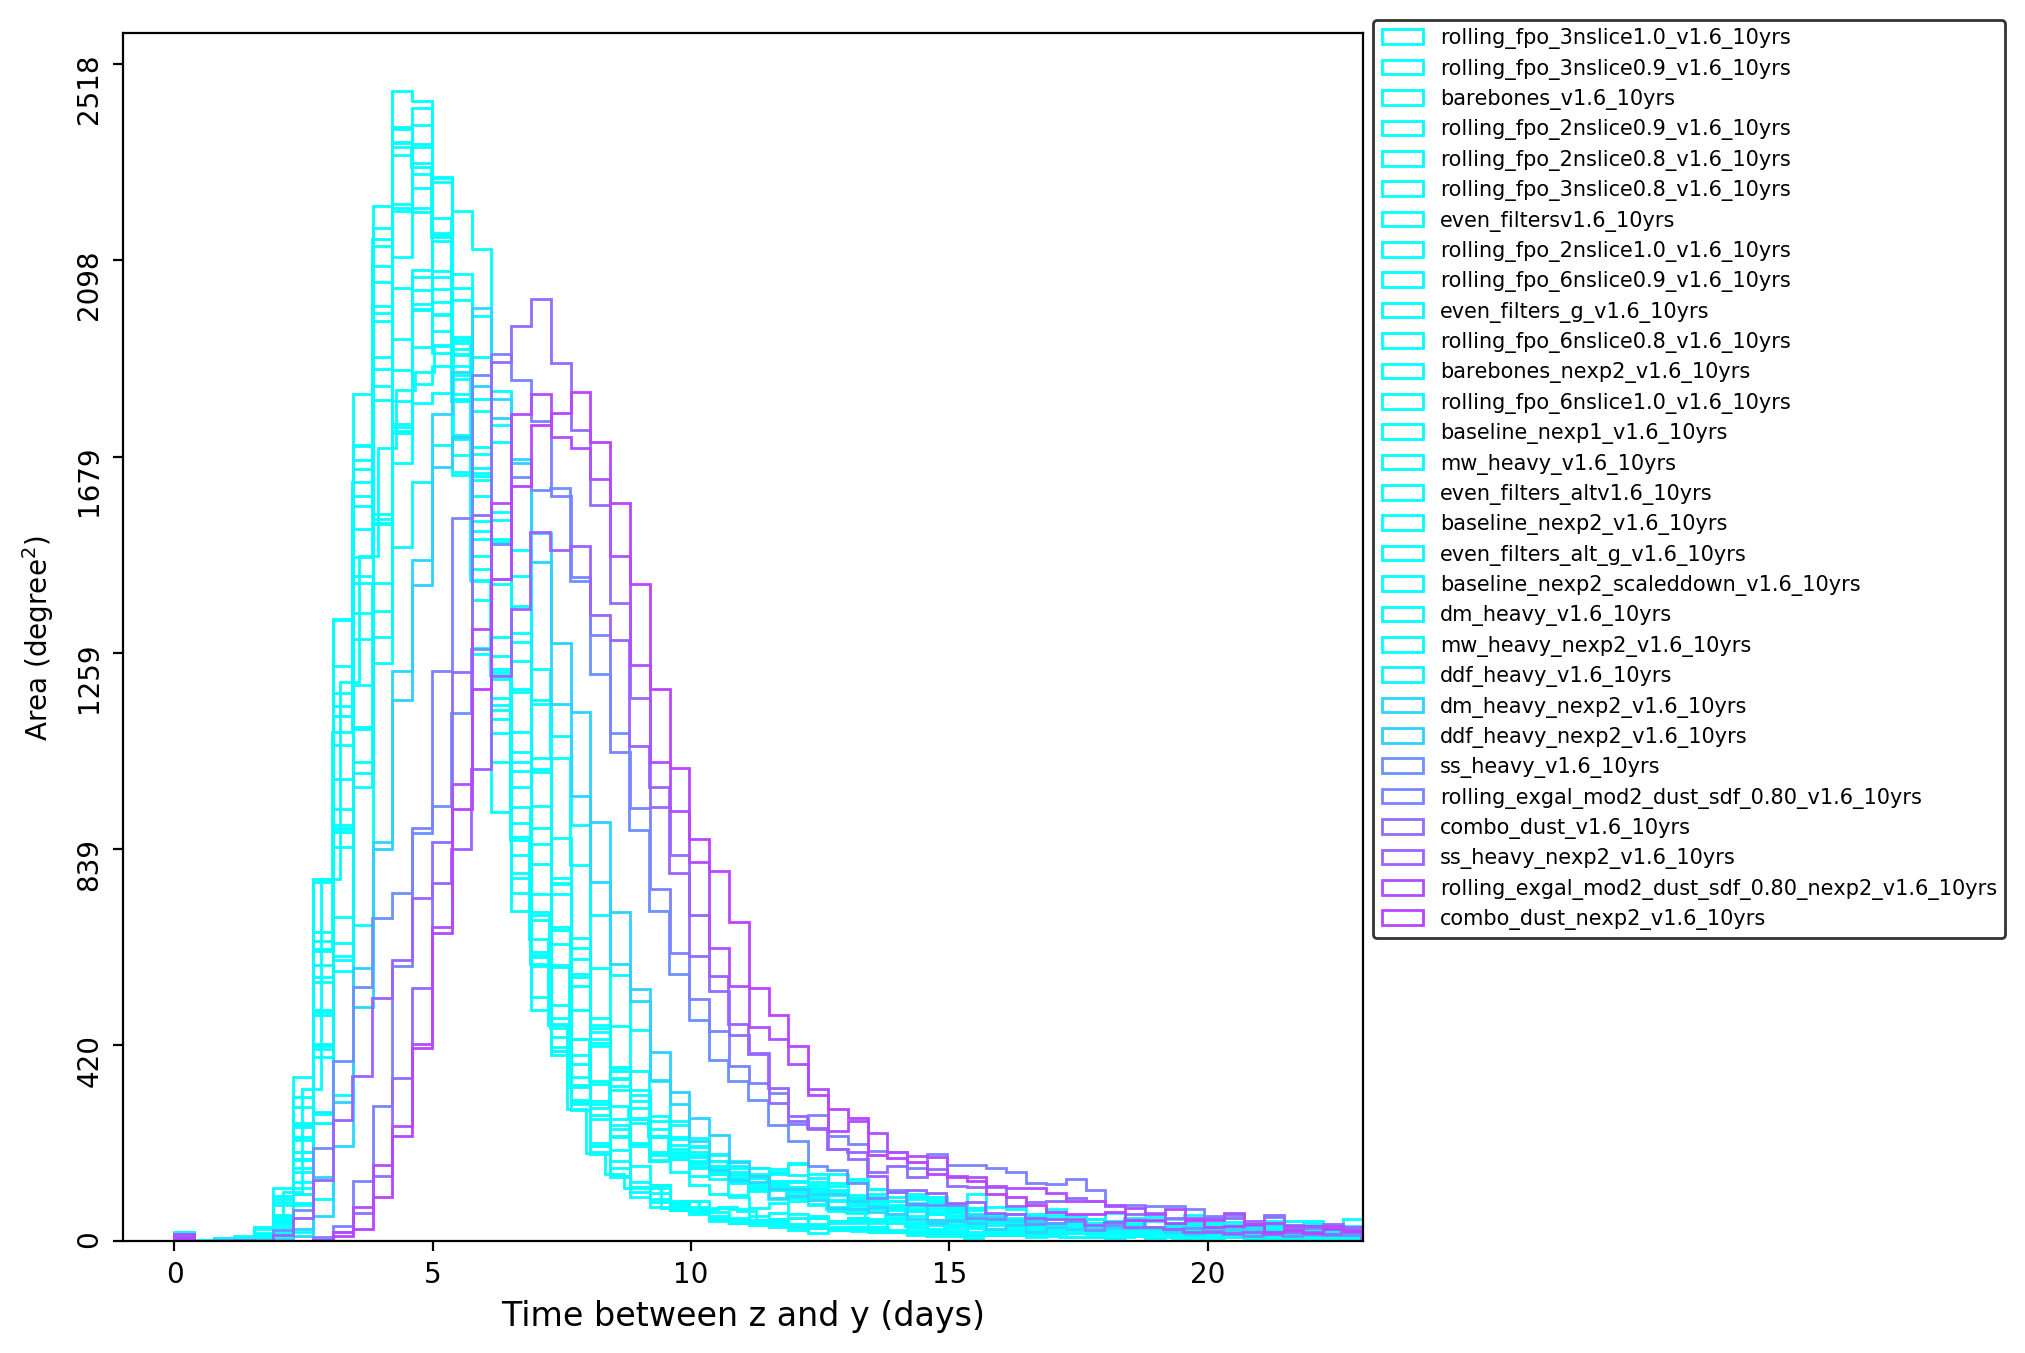

In [17]:
#Plot first FBS v1.5 and then FBS v1.6
data_func = None
xlabel = r"Time between z and y (days)"

Key = metricKeys[4]

healpix_pixarea = bundleDicts_reshuffled[dbRuns[0]][Key].slicer.pixArea * u.sr

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.5", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, mds_offset_cm=1)

plot_OpSims_hist(Key, bundleDicts_reshuffled, data_func=data_func, figsize=(8,8), FBS="v1.6", healpix_pixarea=healpix_pixarea, 
                 datamin=-1, datamax=23, color_map=mpl.cm.cool, xlabel=xlabel, mds_offset_cm=1)